In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import scipy.stats as stats

In [2]:
start = datetime.strptime('2024-01-01', '%Y-%m-%d')
end = datetime.strptime('2025-12-14', '%Y-%m-%d')
ticker_1="NVDA"
ticker_2="BTC-USD"

asset_1 = yf.download(ticker_1, start, end)
asset_2 = yf.download(ticker_2, start, end)

/var/folders/ld/dg7bxfjj6qq8l_c9ht4pn_fw0000gn/T/ipykernel_77634/1575820511.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  asset_1 = yf.download(ticker_1, start, end)
[*********************100%***********************]  1 of 1 completed
/var/folders/ld/dg7bxfjj6qq8l_c9ht4pn_fw0000gn/T/ipykernel_77634/1575820511.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  asset_2 = yf.download(ticker_2, start, end)
[*********************100%***********************]  1 of 1 completed


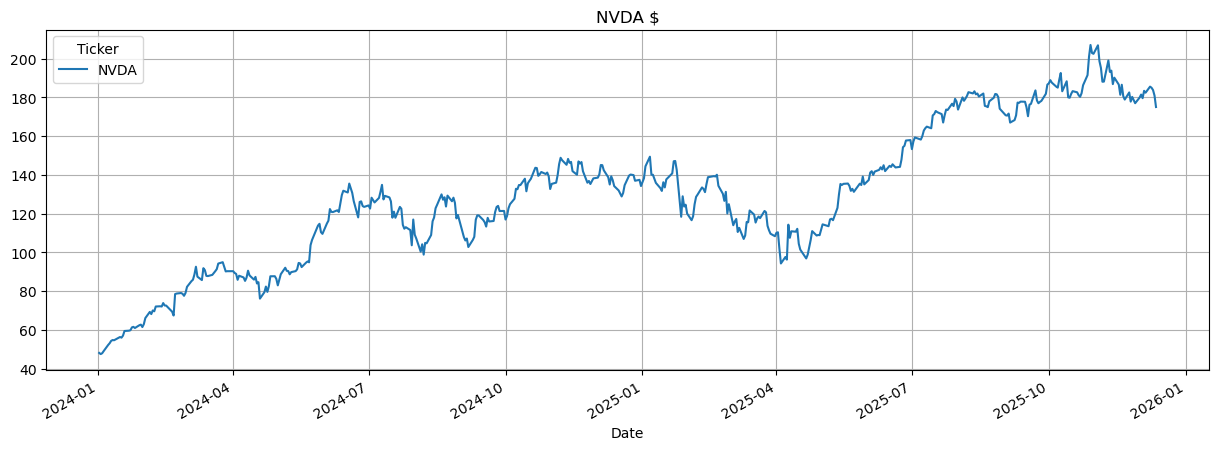

In [3]:
asset_1["Close"].plot(figsize=(15,5), title = "{} $".format(ticker_1))
plt.grid(True)

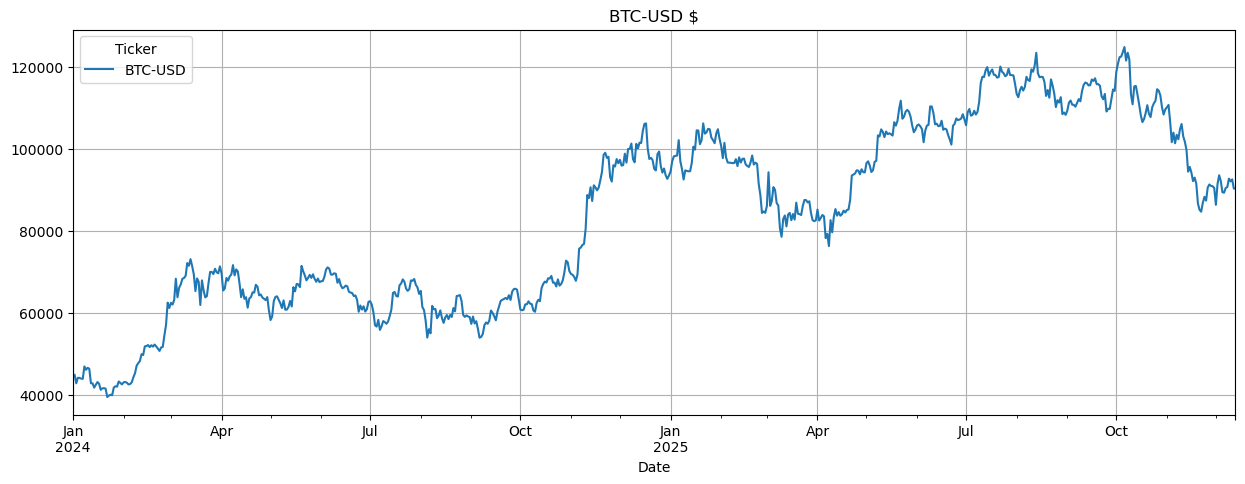

In [4]:
asset_2["Close"].plot(figsize=(15,5), title = "{} $".format(ticker_2))
plt.grid(True)

In [5]:
data = pd.concat([asset_1["Close"], asset_2["Close"]],axis=1).dropna()
data.columns = [ticker_1, ticker_2]
N = len(data.columns)
log_rets = np.log(data/data.shift(1)).dropna()
log_rets_cov = log_rets.cov()

In [6]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

$E[R_{p}] = w_{1}*E[R_{1}] + w_{2}*E[R_{2}] + w_{3}*E[R_{3}]$

In [7]:
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean() * weights) * 252 #Annualized Returns

$Cov = \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix},
w = \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$
    
$Cov * w$

$ = \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$

$ = \begin{bmatrix}
    w_{1} * var(R_{1}) + w_{2} * cov(R_{1}, R_{2}) + w_{3} * cov(R_{1}, R_{3}) \\
    w_{1} * cov(R_{2}, R_{1}) + w_{2} * var(R_{2}) + w_{3} * cov(R_{2}, R_{3}) \\
    w_{1} * cov(R_{3}, R_{1}) + w_{2} * cov(R_{3}, R_{2}) + w_{3} * var(R_{3})
    \end{bmatrix}$
    
$w^{T} * Cov * w$

$ = \begin{bmatrix}
    w_{1} & w_{2} & w_{3}
    \end{bmatrix} *
    \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$
    
$ = \begin{bmatrix}
    w_{1} & w_{2} & w_{3}
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} * var(R_{1}) + w_{2} * cov(R_{1}, R_{2}) + w_{3} * cov(R_{1}, R_{3}) \\
    w_{1} * cov(R_{2}, R_{1}) + w_{2} * var(R_{2}) + w_{3} * cov(R_{2}, R_{3}) \\
    w_{1} * cov(R_{3}, R_{1}) + w_{2} * cov(R_{3}, R_{2}) + w_{3} * var(R_{3})
    \end{bmatrix}$
    
$ = w_{1}^{2} * var(R_{1}) + w_{1} * w_{2} * cov(R_{1}, R_{2}) + w_{1} * w_{3} * cov(R_{1}, R_{3}) + \\
    w_{2} * w_{1} * cov(R_{2}, R_{1}) + w_{2}^{2} * var(R_{2}) + w_{2} * w_{3} * cov(R_{2}, R_{3}) + \\
    w_{3} * w_{1} * cov(R_{3}, R_{1}) + w_{3} * w_{2} * cov(R_{3}, R_{2}) + w_{3}^{2} * var(R_{3})$
    
$ = w_{1}^{2} * var(R_{1}) + w_{2}^{2} * var(R_{2}) + w_{3}^{2} * var(R_{3}) + 2 * w_{1} * w_{2} * cov(R_{1}, R_{2}) + 2 * w_{1} * w_{3} * cov(R_{1}, R_{3}) + 2 * w_{2} * w_{3} * cov(R_{2}, R_{3})$

$\sigma_{p} = \sqrt{w^{T} * Cov * w}$

$ = \sqrt{w_{1}^{2} * var(R_{1}) + w_{2}^{2} * var(R_{2}) + w_{3}^{2} * var(R_{3}) + 2 * w_{1} * w_{2} * cov(R_{1}, R_{2}) + 2 * w_{1} * w_{3} * cov(R_{1}, R_{3}) + 2 * w_{2} * w_{3} * cov(R_{2}, R_{3})}$

In [8]:
def calculate_volatility(weights, log_rets_cov):
    annualized_cov = np.dot(log_rets_cov * 252, weights)
    vol = np.dot(weights.transpose(), annualized_cov)
    return np.sqrt(vol)

From 2024-01-01 to 2025-12-14
NVDA:71.56%
BTC-USD:28.44%


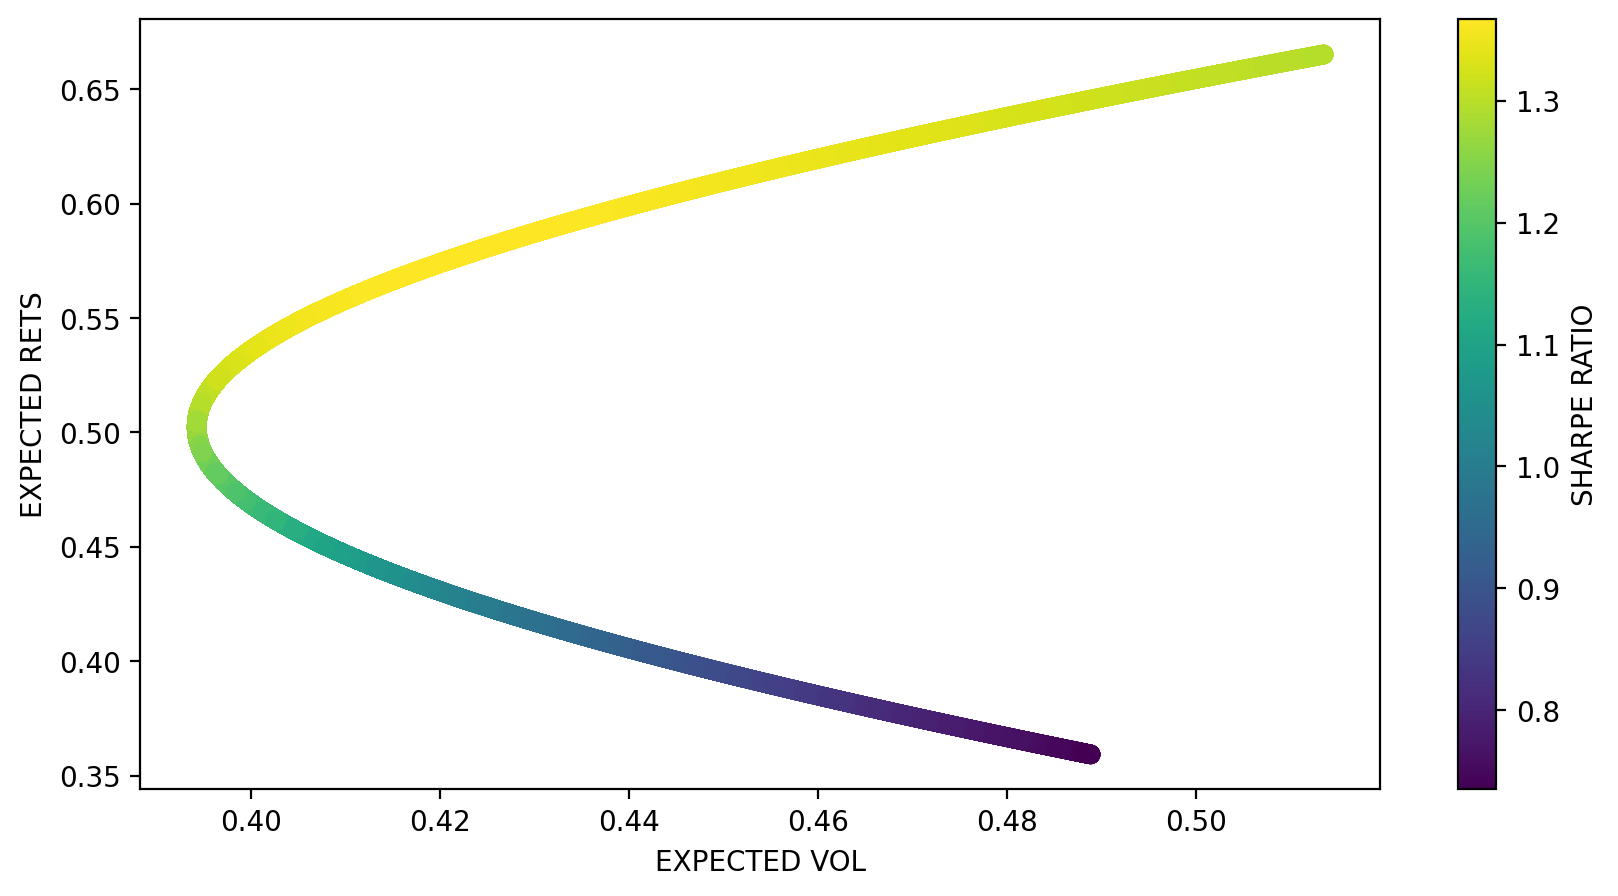

In [9]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(100000):
    weights = gen_weights(N)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights, log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights, log_rets_cov))

mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTED RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

optimized_portfolio_weights=["{:.2%}".format(w) for w in mc_weights[np.argmax(mc_sharpe_ratios)]]

print("From {} to {}".format(start.date(), end.date()))
print("{}:{}".format(ticker_1, optimized_portfolio_weights[0]))
print("{}:{}".format(ticker_2, optimized_portfolio_weights[1]))

In [10]:
from scipy.optimize import minimize

def function_to_minimize(weights):
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

equal_weights = N * [1/N]
bounds = tuple((0,1) for n in range(N))
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

minimize(fun = function_to_minimize, x0 = equal_weights, bounds = bounds, constraints = sum_constraint)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.3667832228828243
       x: [ 7.160e-01  2.840e-01]
     nit: 5
     jac: [ 2.999e-04 -7.563e-04]
    nfev: 15
    njev: 5

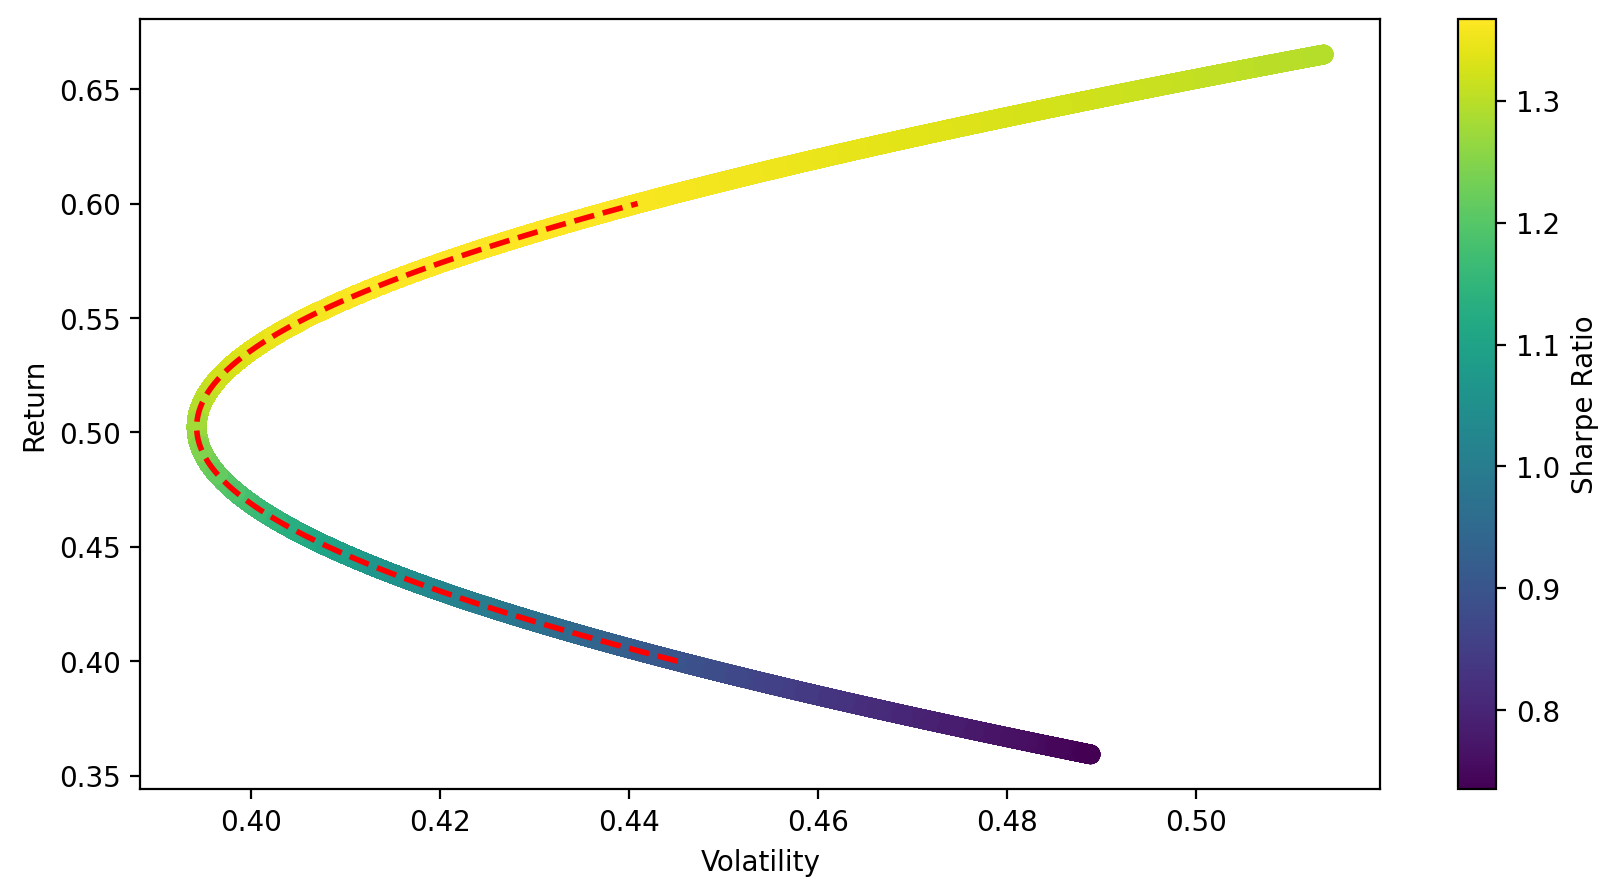

In [11]:
expected_returns_range = np.linspace(0.4,0.6,100)

constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_rets) - possible_return})

# redefine calculate_volatility because scipy.optimize.minimize
# only takes one input (weights) for now 

def calculate_volatility(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

frontier_volatility = []
for possible_return in expected_returns_range:
    result = minimize(calculate_volatility, equal_weights, bounds = bounds, constraints = constraints)
    frontier_volatility.append(result['fun'])

plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,expected_returns_range,'r--',linewidth=2)